# QB Point Analysis
## by Christopher James

## Preliminary Wrangling

This dataset contains statistics of NFL quarterbacks (qbs) from the 2016 season. It also contains statistics on rushing during the same games. Wrangling on these datasets were done in the notebooks 'pass-2016-wrangle.ipynb' and 'run-2016-wrangle.ipynb'. A summary of this can be found in the file 'wrangle_report.pdf'. 

In [107]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

In [108]:
# Any needed functions


# Function to generate a random sample of df rows.
def df_sample(dataframe, samp_size):
    samples = np.random.choice(dataframe.shape[0], samp_size, replace = False)
    return dataframe.loc[samples,:]

In [109]:
# Read 'pass-2016-master.csv' into dataframe called 'df_original', then make copy called 'df' for exploration.
# Read 'Career_Stats_Rushing_master.csv' into df called df_run_original. create copy called df_run
df_original = pd.read_csv('pass-2016-master.csv')
df = df_original.copy()

df_run_original = pd.read_csv('Career_Stats_Rushing_master.csv')
df_run = df_run_original.copy()

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      96 non-null     int64  
 1   Player  96 non-null     object 
 2   Tm      96 non-null     object 
 3   Age     96 non-null     int64  
 4   Pos     78 non-null     object 
 5   G       96 non-null     int64  
 6   GS      96 non-null     int64  
 7   Cmp     96 non-null     int64  
 8   Att     96 non-null     int64  
 9   Cmp%    96 non-null     float64
 10  Yds     96 non-null     int64  
 11  TD      96 non-null     int64  
 12  TD%     96 non-null     float64
 13  Int     96 non-null     int64  
 14  Int%    96 non-null     float64
 15  Lng     96 non-null     int64  
 16  Y/A     96 non-null     float64
 17  AY/A    96 non-null     float64
 18  Y/C     81 non-null     float64
 19  Y/G     96 non-null     float64
 20  Rate    96 non-null     float64
 21  QBR     88 non-null     float64
 22  Sk  

In [111]:
df_run.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17506 entries, 0 to 17505
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Player_Id                          17506 non-null  object 
 1   Name                               17506 non-null  object 
 2   Position                           2319 non-null   object 
 3   Year                               17506 non-null  int64  
 4   Team                               17506 non-null  object 
 5   Games_Played                       17506 non-null  int64  
 6   Rushing_Attempts                   11456 non-null  float64
 7   Rushing_Attempts_Per_Game          17506 non-null  float64
 8   Rushing_Yards                      11069 non-null  float64
 9   Yards_Per_Carry                    11375 non-null  float64
 10  Rushing_Yards_Per_Game             11444 non-null  float64
 11  Rushing_TDs                        11456 non-null  flo

In [112]:
# filter out all players who are not quarterbacks who had less than 100 pass attempts in a season.
df = df.query('Pos == "QB" & Att > 100')

In [113]:
# Create column that contains the percentage of all games that ended in a win. 
df['QBwin%'] = ((df['QBwin'] / (df['QBwin'] + df['QBlose'] + df['QBtie'])) * 100).round(3)

In [114]:
# filter out all games in df_run that did not take place in the 2016 season. Remove year column
df_run = df_run.query('Year == 2016')
df_run.drop(columns = 'Year', inplace = True)
df_run.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 72 to 17492
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Player_Id                          449 non-null    object 
 1   Name                               449 non-null    object 
 2   Position                           447 non-null    object 
 3   Team                               449 non-null    object 
 4   Games_Played                       449 non-null    int64  
 5   Rushing_Attempts                   322 non-null    float64
 6   Rushing_Attempts_Per_Game          449 non-null    float64
 7   Rushing_Yards                      310 non-null    float64
 8   Yards_Per_Carry                    322 non-null    float64
 9   Rushing_Yards_Per_Game             322 non-null    float64
 10  Rushing_TDs                        322 non-null    float64
 11  Longest_Rushing_Run                281 non-null    floa

In [116]:
# group df_run by team, then add together.
df_run = df_run.groupby(['Team']).sum()
df_run.head()

,Games_Played,Rushing_Attempts,Rushing_Attempts_Per_Game,Rushing_Yards,Yards_Per_Carry,Rushing_Yards_Per_Game,Rushing_TDs,Longest_Rushing_Run,Rushing_First_Downs,Percentage_of_Rushing_First_Downs,Rushing_More_Than_20_Yards,Rushing_More_Than_40_Yards,Fumbles
Team,,,,,,,,,,,,,
Arizona Cardinals,158,398.0,30.7,493.0,57.5,132.1,20.0,72.0,97.0,322.2,10.0,4.0,10.0
Atlanta Falcons,144,416.0,32.1,844.0,35.2,149.1,20.0,95.0,107.0,178.7,15.0,4.0,3.0
Baltimore Ravens,202,367.0,35.6,1463.0,48.3,146.5,10.0,158.0,79.0,319.2,8.0,1.0,4.0
Buffalo Bills,177,492.0,35.7,1363.0,72.8,183.8,29.0,150.0,146.0,600.3,27.0,5.0,11.0
Carolina Panthers,123,453.0,41.8,1814.0,33.7,166.3,16.0,161.0,99.0,127.0,10.0,1.0,6.0


In [82]:
df_run.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 32 entries, (2016, 'Arizona Cardinals') to (2016, 'Washington Redskins')
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Games_Played                       32 non-null     int64  
 1   Rushing_Attempts                   32 non-null     float64
 2   Rushing_Attempts_Per_Game          32 non-null     float64
 3   Rushing_Yards                      32 non-null     float64
 4   Yards_Per_Carry                    32 non-null     float64
 5   Rushing_Yards_Per_Game             32 non-null     float64
 6   Rushing_TDs                        32 non-null     float64
 7   Longest_Rushing_Run                32 non-null     float64
 8   Rushing_First_Downs                32 non-null     float64
 9   Percentage_of_Rushing_First_Downs  32 non-null     float64
 10  Rushing_More_Than_20_Yards         32 non-null     float64
 11  Rushing

In [9]:
df.corr()['TD%']

Rk       -0.383626
Age       0.326116
G         0.504449
GS        0.520878
Cmp       0.509690
Att       0.476504
Cmp%      0.446663
Yds       0.616831
TD        0.863558
TD%       1.000000
Int       0.108271
Int%     -0.304491
Lng       0.187266
Y/A       0.718339
AY/A      0.770051
Y/C       0.517496
Y/G       0.657907
Rate      0.758195
QBR       0.738103
Sk        0.228052
Yds.1     0.202902
NY/A      0.726855
ANY/A     0.778069
Sk%      -0.400363
4QC      -0.039211
GWD       0.117480
QBwin     0.591395
QBlose   -0.016240
QBtie    -0.049153
QBwin%    0.554299
Name: TD%, dtype: float64

### What is the structure of your dataset?

This dataset contains 96 rows and 32 columns. There are 3 catagorical columns, while the rest are numerical. Those columns are 'Rk', 'Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', 'Lng', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate', 'QBR', 'Sk', 'Yds.1', 'NY/A', 'ANY/A', 'Sk%', '4QC', 'GWD', 'QBwin', 'QBlose', and 'QBtie'.

### What is/are the main feature(s) of interest in your dataset?

I am looking to discover what features lead to a higher touchdown per pass attempt ratio (TD%).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I believe based on the coorelation numbers shown above, completion percentage (Cmp%), yards per attempt (Y/A), yards per catch (Y/C), yards per game (Y/G),  quarterback rating (QBR) and QB win percentage (QBwin%) will have an effect on this number. 

## Univariate Exploration

### Distribution of Completion Percentage

In [10]:
# Stats on Cmp% column.
cmp = df['Cmp%'].describe()
cmp

count    39.000000
mean     62.446154
std       4.559827
min      52.900000
25%      59.200000
50%      62.400000
75%      65.650000
max      71.600000
Name: Cmp%, dtype: float64

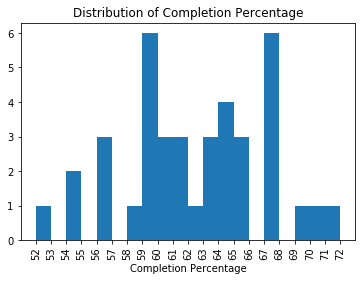

In [11]:
#Distribution of completion percentage
bins = np.arange(cmp['min'].astype(int), (cmp['max'] + 1).round(0).astype(int), 1)
ticks = bins
labels = ["{}".format(val) for val in ticks]

plt.hist(data = df, x = 'Cmp%', bins = bins)
plt.title('Distribution of Completion Percentage')
plt.xlabel('Completion Percentage')
plt.xticks(ticks, labels, rotation = 90);

The distribution of completion percentage ranges from 52% to 72%. A majority of the players tend to fall to the center of the distribution.

### Distribution of Average Yards per Attempt

In [12]:
# Stats on Y/A column.
ypa = df['Y/A'].describe()
ypa

count    39.000000
mean      7.092308
std       0.770982
min       5.300000
25%       6.700000
50%       7.100000
75%       7.600000
max       9.300000
Name: Y/A, dtype: float64

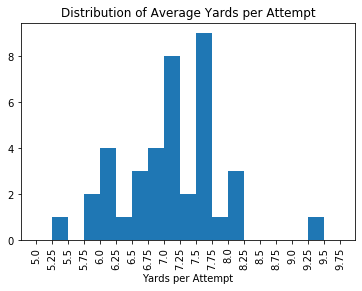

In [13]:
# Distribution of Average Yards per Attempt
bins = np.arange(ypa['min'].astype(int), ypa['max'].round() + 1, 0.25)
ticks = bins
labels = ["{}".format(val) for val in ticks]

plt.hist(data = df, x = 'Y/A', bins = bins)
plt.title('Distribution of Average Yards per Attempt')
plt.xlabel('Yards per Attempt')
plt.xticks(ticks, labels, rotation = 90);

The distribution of average yards per attempt ranges from 5.25 to 9.25, with the majority of the players falling to the center of the distribution. Almost half of all players are in the 7.0 and 7.75 bins.

### Distribution of Average Yards per Catch

In [14]:
# Stats on Y/C column.
ypc = df['Y/C'].describe()
ypc

count    39.000000
mean     11.371795
std       0.958329
min       9.700000
25%      10.750000
50%      11.400000
75%      12.050000
max      13.300000
Name: Y/C, dtype: float64

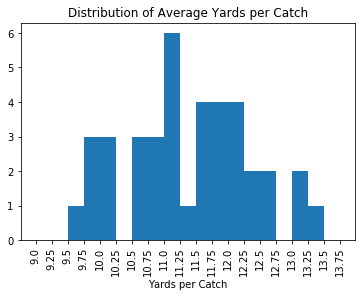

In [15]:
#Distribution of Average Yards per Catch
bins = np.arange(ypc['min'].astype(int), ypc['max'].round() + 1, 0.25)
ticks = bins
labels = ["{}".format(val) for val in ticks]

plt.hist(data = df, x = 'Y/C', bins = bins)
plt.title('Distribution of Average Yards per Catch')
plt.xlabel('Yards per Catch')
plt.xticks(ticks, labels, rotation = 90);

The distribution of average yards per catch ranges from 9.5 to 13.5. The majority of players range from 10.5 to 12.75.

### Distribution of Average Yards per Game

In [16]:
# # Stats on Y/G column
ypg = df['Y/G'].describe()
ypg

count     39.000000
mean     237.882051
std       45.415519
min      134.800000
25%      215.900000
50%      240.800000
75%      270.100000
max      325.500000
Name: Y/G, dtype: float64

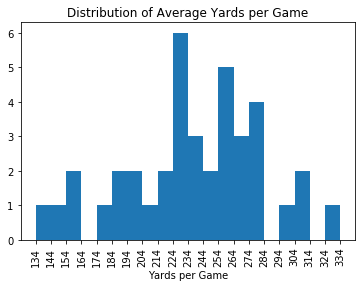

In [17]:
#Distribution of Average Yards per Game
bins = np.arange(ypg['min'], ypg['max'] + 10, 10).astype(int)
ticks = bins
labels = ["{}".format(val) for val in ticks]

plt.hist(data = df, x = 'Y/G', bins = bins)
plt.title('Distribution of Average Yards per Game')
plt.xlabel('Yards per Game')
plt.xticks(ticks, labels, rotation = 90);

The distribution of average yards per game ranges from 145 to 334. The majority of players range from 224 to 284.

### Distribution of Quarterback Rating

In [18]:
# Stats on QBR column
qbr = df['QBR'].describe()
qbr

count    39.000000
mean     52.351282
std      15.069730
min      16.100000
25%      45.400000
50%      53.700000
75%      60.550000
max      79.400000
Name: QBR, dtype: float64

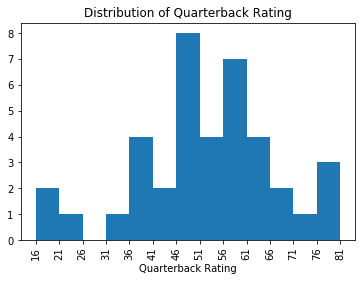

In [19]:
# Distribution of QBR
bins = np.arange(qbr['min'].astype(int), qbr['max'] + 5, 5).astype(int)
ticks = bins
labels = ["{}".format(val) for val in ticks]

plt.hist(data = df, x = 'QBR', bins = bins)
plt.title('Distribution of Quarterback Rating')
plt.xlabel('Quarterback Rating')
plt.xticks(ticks, labels, rotation = 90);

The distribution of quarterback rating ranges from 16 to 76. The majority of players range on the higher end from 46 to 66.

### Distribution of Quarterback Win Percentage

In [20]:
# Stats on QBwin% column
qbwin = df['QBwin%'].describe()
qbwin

count    39.000000
mean     43.816282
std      23.658166
min       0.000000
25%      22.500000
50%      46.667000
75%      59.340500
max      91.667000
Name: QBwin%, dtype: float64

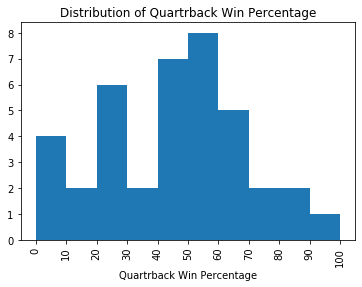

In [21]:
# Distribution of Quartrback Win Percentage
bins = np.arange(qbwin['min'], qbwin['max'] + 10, 10).astype(int)
ticks = bins
labels = ["{}".format(val)  for val in ticks]

plt.hist(data = df, x = 'QBwin%', bins = bins)
plt.title('Distribution of Quartrback Win Percentage')
plt.xlabel('Quartrback Win Percentage')
plt.xticks(ticks, labels, rotation = 90);

The distribution of quarterback win percentage ranges from 0% to 100%. The majority of players range from 20% to 70%.

### Discuss the distribution(s) of your variable(s) of interest.

The distribution of completion percentage ranges from 52% to 72%. A majority of the players tend to fall to the center of the distribution. The distribution of average yards per attempt ranges from 5.25 to 9.25, with the majority of the players falling to the center of the distribution. Almost half of all players are in the 7.0 and 7.75 bins. The distribution of average yards per catch ranges from 9.5 to 13.5. The majority of players range from 10.5 to 12.75. The distribution of average yards per game ranges from 145 to 334. The majority of players range from 224 to 284. The distribution of quarterback rating ranges from 16 to 76. The majority of players range on the higher end from 46 to 66. The distribution of quarterback win percentage ranges from 0% to 100%. The majority of players range from 20% to 70%.

## Bivariate Exploration

### Touchdown Percentage by Completion Percentage

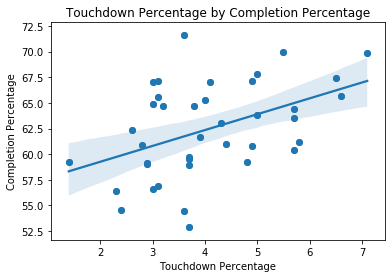

In [22]:
#Touchdown Percentage by Completion Percentage
sb.regplot(df['TD%'], df['Cmp%'])
plt.scatter(data = df, x = 'TD%', y = 'Cmp%')
plt.title('Touchdown Percentage by Completion Percentage')
plt.xlabel('Touchdown Percentage')
plt.ylabel('Completion Percentage');

There appears to be a moderate positive coorelation between touchdown percentage and completion percentage. This coorelation weakens at moderate levels before climbing again, suggesting that there are several quarterbacks who have high completion percentages yet fail to score many touchdowns. 

### Touchdown Percentage by Yards per Pass Attempt

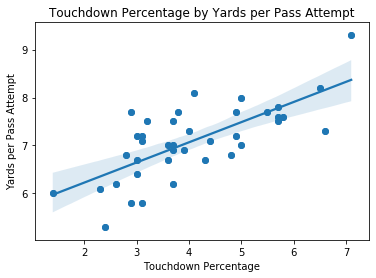

In [23]:
#Touchdown Percentage by Yards per Pass Attempt
sb.regplot(df['TD%'], df['Y/A'])
plt.scatter(data = df, x = 'TD%', y = 'Y/A')
plt.title('Touchdown Percentage by Yards per Pass Attempt')
plt.xlabel('Touchdown Percentage')
plt.ylabel('Yards per Pass Attempt');

There is a strong positive coorelation between touchdown percantage and yards per pass attempt. Note the groups of quarterbacks who have very similar stats.

### Touchdown Percentage by Yards per Catch

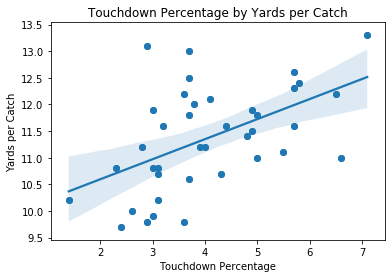

In [24]:
#Touchdown Percentage by Yards per Catch
sb.regplot(df['TD%'], df['Y/C'])
plt.scatter(data = df, x = 'TD%', y = 'Y/C')
plt.title('Touchdown Percentage by Yards per Catch')
plt.xlabel('Touchdown Percentage')
plt.ylabel('Yards per Catch');

There is a moderate positive coorelation between touchdown percentage and yards per catch. Interesting here is the small groups of quarterbacks that have similar stats.

### Touchdown Percentage by Yards per Game

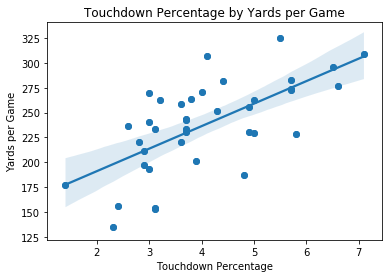

In [25]:
#Touchdown Percentage by Yards per Game
sb.regplot(df['TD%'], df['Y/G'])
plt.scatter(data = df, x = 'TD%', y = 'Y/G')
plt.title('Touchdown Percentage by Yards per Game')
plt.xlabel('Touchdown Percentage')
plt.ylabel('Yards per Game');

There is a strong positive coorelation between touchdown percentage and yards per game. It will be interesting to see the relation between this and a team's running game. I will explore that in the multivariate section.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!